### The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution — in other words,
a mathematical equation that gives the result directly. This is called the Normal Equation
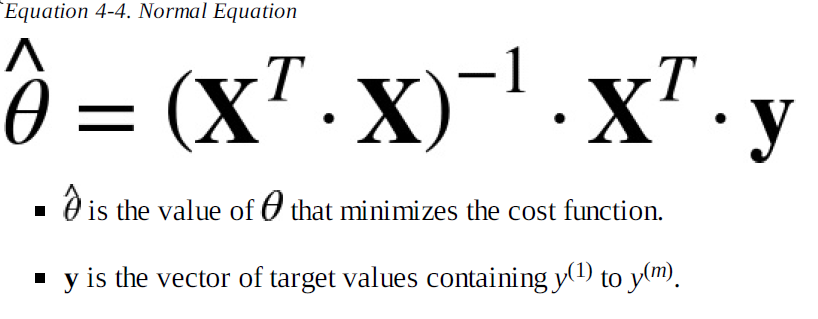

note that the above equation is solution of (i.e. minima solution):
$J(w)$ = $||e||^2$ = ${||y - Xw||}^2$ 

A nice derivation of this equation is here:
http://mlwiki.org/index.php/Normal_Equation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [3]:
# Let’s generate some linear-looking data to test this equation on
X = 2*np.random.rand(100,1)
y = 4 + 3*X +np.random.rand(100,1)

(0, 11)

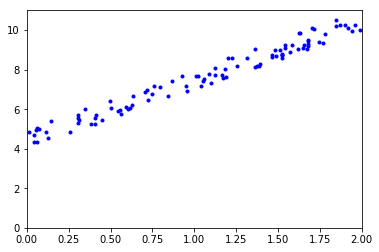

In [4]:
plt.plot(X,y,"b.")
plt.xlim([0,2])
plt.ylim([0,11])

Now let’s compute $\hat{\theta}$ using the Normal Equation. We will use the inv() function from NumPy’s Linear
Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix
multiplication:

In [5]:
X_b = np.c_[np.ones((100,1)),X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.5079734 ],
       [2.92849647]])

The actual function that we used to generate the data is y = 4 + 3x0 + Gaussian noise. 

Hence the computed parameters are quite close to 4 and 3. It is not exactly 4 and 3 because of the added noise.

Now you can make predictions using $\hat{\theta}$

[[ 4.5079734 ]
 [10.36496634]]


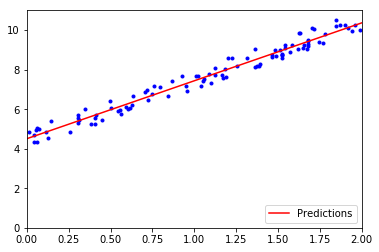

In [6]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_pred = X_new_b.dot(theta_best)
print(y_pred)

plt.plot(X,y,"b.")
plt.plot(X_new,y_pred,"r-",label="Predictions")
plt.xlim([0,2])
plt.ylim([0,11])
plt.legend(loc="lower right")


In [7]:
# The equivalent code on Scikit-Learn looks like:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict(X_new)

array([[ 4.5079734 ],
       [10.36496634]])

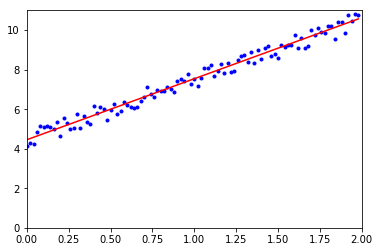

In [8]:
X = np.array([i*0.02 for i in range(100)]).reshape(100,1)
Y = 3*X + 4 + np.random.rand(100,1)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
plt.xlim([0,2])
plt.ylim([0,11])
plt.plot(X,Y,"b.")
plt.plot(X,lin_reg.predict(X),"r-")

### Computational Complexity

The Normal Equation computes the inverse of $X^T · X$, which is an $n x n$ matrix (where n is the number of
features). The computational complexity of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^3)$
(depending on the implementation). In other words, if you double the number of features, you multiply the
computation time by roughly $2^{2.4}$ = 5.3 to $2^3$ = 8.

On the positive side, this equation is linear with regards to the number of instances in the training set (it is
O(m)), so it handles large training sets efficiently, provided they can fit in memory.
Also, once you have trained your Linear Regression model (using the Normal Equation or any other
algorithm), predictions are very fast: the computational complexity is linear with regards to both the
number of instances you want to make predictions on and the number of features. In other words, making
predictions on twice as many instances (or twice as many features) will just take roughly twice as much
time.

Now we will look at very different ways to train a Linear Regression model, better suited for cases
where there are a large number of features, or too many training instances to fit in memory.

### Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide
range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to
minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your
feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the
steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error
function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once
the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called random initialization), and then you
improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function
(e.g., the MSE), until the algorithm converges to a minimum

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate
hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations
to converge, which will take a long time

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other
side, possibly even higher up than you were before. This might make the algorithm diverge, with larger
and larger values, failing to find a good solution

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all
sorts of irregular terrains, making convergence to the minimum very difficult. Figure 4-6 shows the two
main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it
will converge to a local minimum, which is not as good as the global minimum. If it starts on the right,
then it will take a very long time to cross the plateau, and if you stop too early you will never reach the
global minimum.

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which
means that if you pick any two points on the curve, the line segment joining them never crosses the curve.
This implies that there are no local minima, just one global minimum. It is also a continuous function with
a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is
guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning
rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very
different scales. 

This diagram also illustrates the fact that training a model means searching for a combination of model
parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter
space: the more parameters a model has, the more dimensions this space has, and the harder the search is:
searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions.
Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the
bottom of the bowl.

#### Warning: When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

#### Batch Gradient Descent
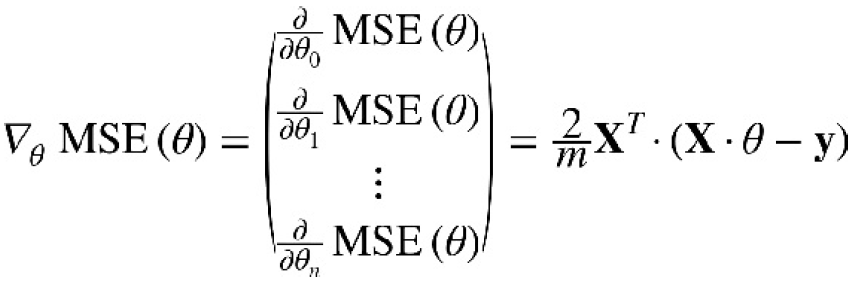
#### Warning: Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step. As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation.

### Stochastic Gradient Descent
To perform Linear Regression using SGD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function. The following code runs 50 epochs, starting with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one), and it does not use any regularization (penalty=None; more details on this shortly):

In [9]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [10]:
# Once again, you find a solution very close to the one returned by the Normal Equation:
sgd_reg.intercept_, sgd_reg.coef_

(array([7.45121175]), array([0.17821211]))

### Polynomial Regression

Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial
Regression.

In [13]:
m = 100
X = 6*np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)

In [19]:
max(X),max(y)
#plt.xlim([0,max(X)])
#plt.ylim([0,max(y)])
#plt.plot(X,y,"b.")

(array([2.9937621]), array([9.25194633]))

In [20]:
# clearly this data will never fit in a straight line. Lets try adding the square(2nd degree polynomial) of each feature
# in the training set as new features
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.37062214]), array([-0.37062214,  0.13736077]))

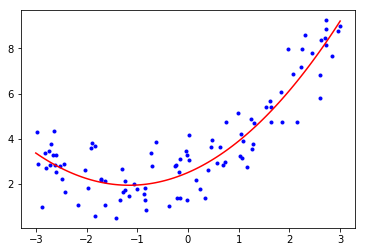

In [43]:
# X_poly now contains the original feature of X plus the square of this feature. Now you can fit a
# LinearRegression model to this extended training data
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)#np.concatenate((np.ones([100,1]),X_new),axis=1)
#plt.xlim([0,max(X)])
#plt.ylim([0,max(y)])
plt.plot(X,y,"b.")
plt.plot(X_new,lin_reg.predict(X_new_poly),"r-")